In [60]:
import numpy as np
import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [6]:
#Reading the csv file 
path_in=pd.read_csv("C:\\BDP\\data_w_pop.csv",sep=",")
path_in.head()

,block,weeks,temperature,precipitation,road_length,biodiversity,city_index,observations
0,11293,1,4.753241,1.205985,7379.609428,53,0,0
1,11306,26,21.284382,5.170138,23701.080083,61,5,1
2,11306,25,21.952270,2.321593,23701.080083,61,5,0
3,11306,24,24.185841,0.000000,23701.080083,61,5,0
4,11306,23,22.169913,3.983620,23701.080083,61,5,0


# EDA (Exploratory Data Analysis)

In [7]:
#Checking for missing values and the datatypes of the dataset
path_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941382 entries, 0 to 941381
Data columns (total 8 columns):
block            941382 non-null int64
weeks            941382 non-null int64
temperature      941382 non-null float64
precipitation    941382 non-null float64
road_length      941382 non-null float64
biodiversity     941382 non-null int64
city_index       941382 non-null int64
observations     941382 non-null int64
dtypes: float64(3), int64(5)
memory usage: 57.5 MB


In [8]:
#Displaying the shape of the dataset
(len(path_in), path_in.shape[1])

(941382, 8)

In [30]:
# Saving the true values in an array
y = np.array(path_in['observations'])
# Dropping the columns not needed for the analysis
x= path_in.drop(['block','weeks','observations'],  axis =1)
x.head()

,temperature,precipitation,road_length,biodiversity,city_index
0,4.753241,1.205985,7379.609428,53,0
1,21.284382,5.170138,23701.080083,61,5
2,21.952270,2.321593,23701.080083,61,5
3,24.185841,0.000000,23701.080083,61,5
4,22.169913,3.983620,23701.080083,61,5


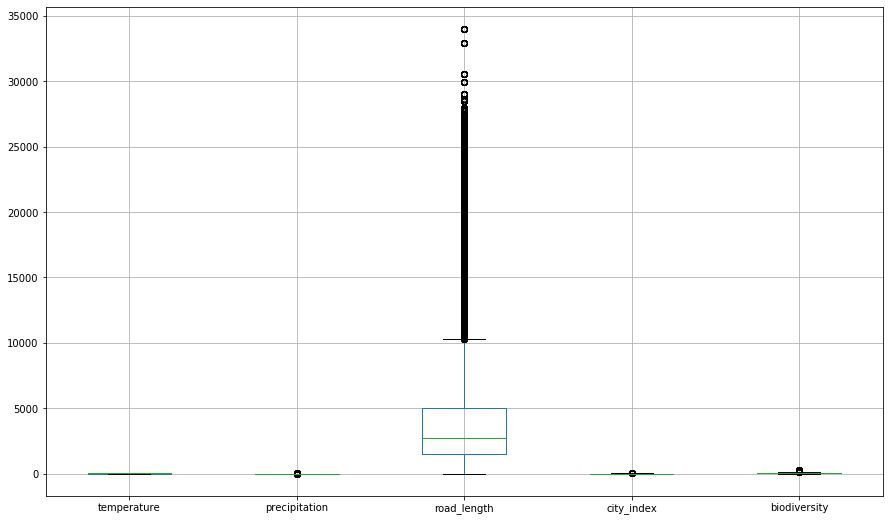

In [31]:
# Checking for the outliers in the input data
x.boxplot(column=['temperature','precipitation','road_length','city_index','biodiversity'],figsize=(15,9))
plt.show()

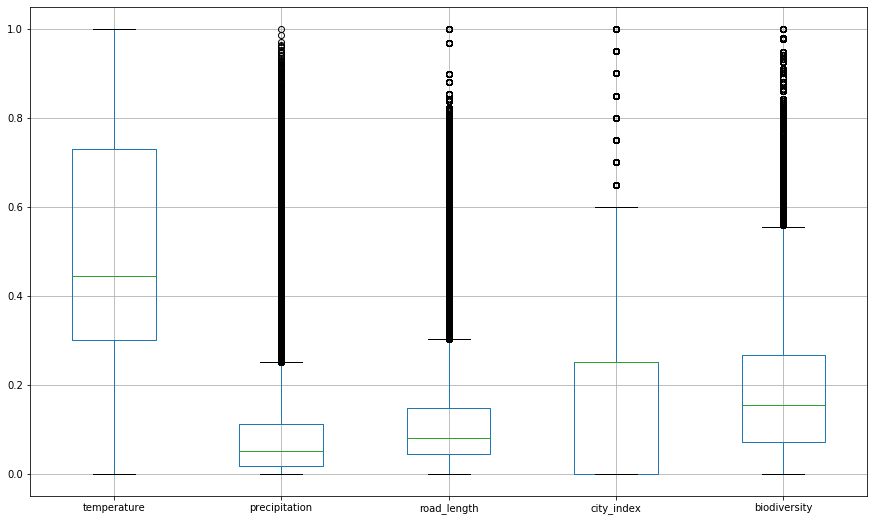

In [10]:
# Improvising the data

x['temperature'] = (x['temperature']-x['temperature'].min()) / (x['temperature'].max()-x['temperature'].min())
x['precipitation'] = (x['precipitation']-x['precipitation'].min()) / (x['precipitation'].max()-x['precipitation'].min())
x['road_length'] = (x['road_length']-x['road_length'].min()) / (x['road_length'].max()-x['road_length'].min())
x['city_index'] = (x['city_index']-x['city_index'].min()) / (x['city_index'].max()-x['city_index'].min())
x['biodiversity'] = (x['biodiversity']-x['biodiversity'].min()) / (x['biodiversity'].max()-x['biodiversity'].min())
x.boxplot(column=['temperature','precipitation','road_length','city_index','biodiversity'],figsize=(15,9))
plt.show()

In [11]:
# computing the summary of statistics of the dataframe
x.describe()

,temperature,precipitation,road_length,biodiversity,city_index
count,941382.000000,941382.000000,941382.000000,941382.000000,941382.000000
mean,0.479617,0.081503,0.126036,0.187808,0.240317
std,0.258798,0.093912,0.136706,0.147375,0.229600
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299852,0.017689,0.044097,0.071429,0.000000
50%,0.444840,0.051905,0.080455,0.154762,0.250000
75%,0.729653,0.111377,0.147447,0.265873,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000


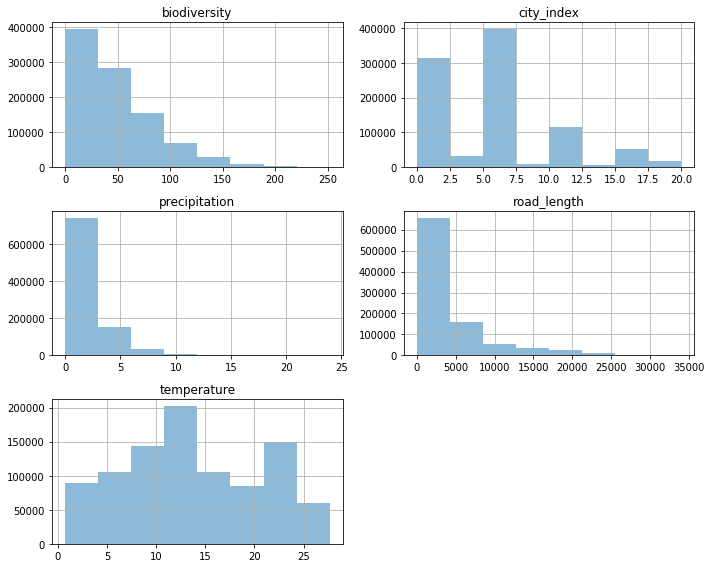

In [42]:
#Checking for the skewness in the input data
x.hist(column=['temperature','precipitation','road_length','biodiversity','city_index'],bins=8,alpha=0.5, figsize=(10, 8))

plt.tight_layout()
plt.show()

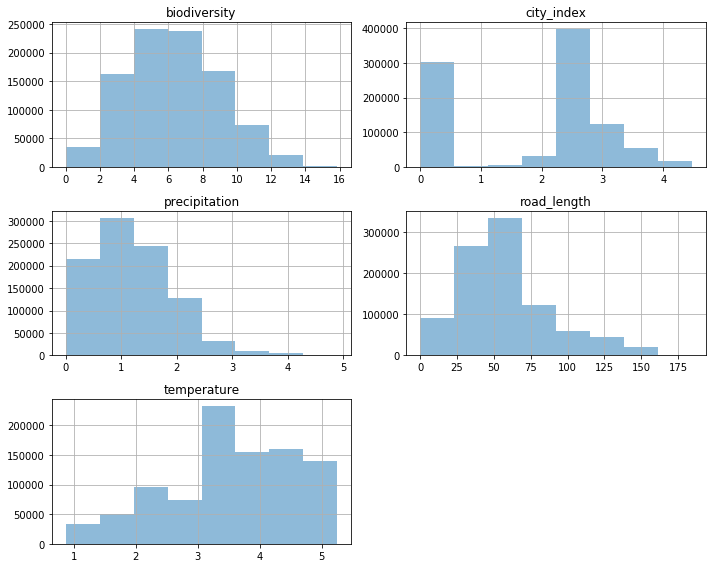

In [46]:
#Applyting sqrt function to make the data normally distributed
#x.hist(column=['temperature','precipitation','road_length','biodiversity','city_index'],bins=8,alpha=0.5, figsize=(10, 8))
sqrt_x = np.sqrt(x)
sqrt_x.hist(bins=8,alpha=0.5, figsize=(10, 8))
plt.tight_layout()
plt.show()

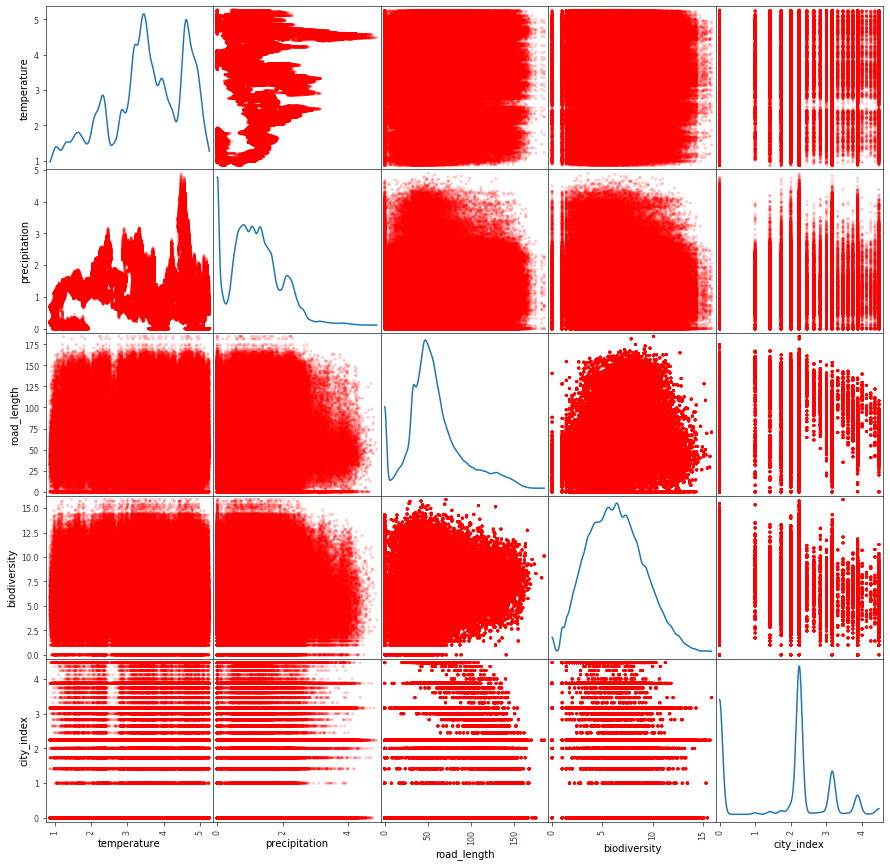

In [59]:
from pandas.plotting import scatter_matrix 
scatter_matrix(sqrt_x,alpha=0.2, figsize=(15,15),diagonal='kde',c='r')
plt.show()

In [47]:
#Displaying the new input dataset that will be used in the model_only top 5 here
sqrt_x.head(5)

,temperature,precipitation,road_length,biodiversity,city_index
0,2.180193,1.098174,85.904653,7.28011,0.000000
1,4.613500,2.273794,153.951551,7.81025,2.236068
2,4.685325,1.523677,153.951551,7.81025,2.236068
3,4.917910,0.000000,153.951551,7.81025,2.236068
4,4.708494,1.995901,153.951551,7.81025,2.236068


# Modelling with Regression Algorithmn

## Random Forest

In [48]:
# Splitting the data into test and train
xtrain, xtest, ytrain, ytest = train_test_split(sqrt_x,y, test_size = 0.25, train_size = 0.75, random_state = np.random)

# Printing the size of the training and test dataset
print(x.shape, y.shape)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(941382, 5) (941382,)
(706036, 5) (235346, 5)
(706036,) (235346,)


In [49]:
rf = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, max_features="auto", bootstrap=True, min_samples_split=2, n_jobs=1)
# Fiting it into the model
rf.fit(xtrain, ytrain);
#Predicting the accuray of the model
ypred = rf.predict(xtest)
print("R2 Score: ", r2_score(ytest,ypred))

R2 Score:  0.3826891902845003


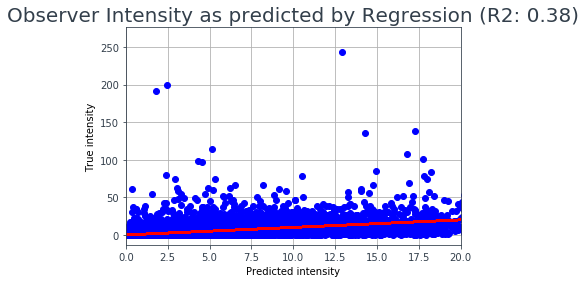

In [58]:
#Visualizing the true v/s predicted data
plt.title("Observer Intensity as predicted by Regression (R2: 0.38)", size=20)
plt.plot(ypred, ytest, "o",color='b')
plt.plot(ypred, ypred, "r-", linewidth=2)
plt.xlabel("Predicted intensity", size=10)
plt.ylabel("True intensity", size=10)
plt.xlim(0, 20)
plt.grid()
plt.savefig("C:\BDP\CORR.png")

In [53]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(sqrt_x, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: biodiversity         Importance: 0.31
Variable: temperature          Importance: 0.26
Variable: precipitation        Importance: 0.21
Variable: road_length          Importance: 0.19
Variable: city_index           Importance: 0.03


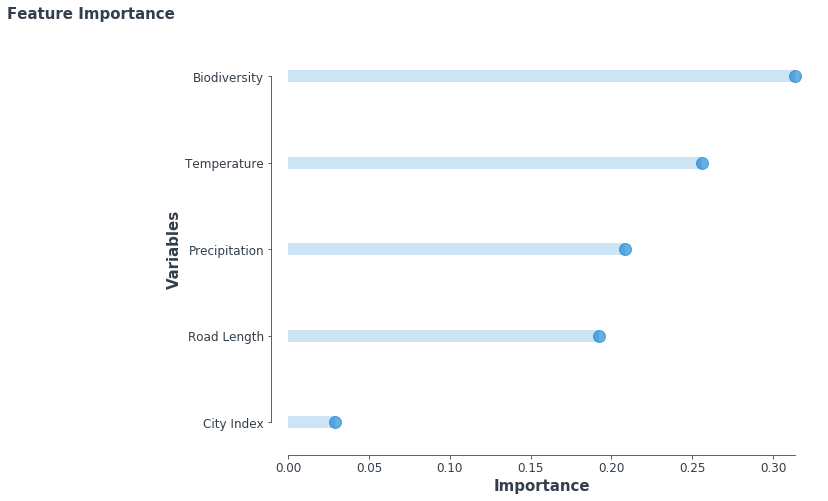

In [54]:
# Visualizing the feature importance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'
Importance = pd.Series(importances, 
                        index=['Temperature','Precipitation','Road Length','Biodiversity','City Index'])
df = pd.DataFrame({'Importance' : Importance})
df = df.sort_values(by='Importance')
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(10,7))

plt.hlines(y=my_range, xmin=0, xmax=df['Importance'], color='#007ACC', alpha=0.2, linewidth=12)

plt.plot(df['Importance'], my_range, "o", markersize=12, color='#007ACC', alpha=0.6)

ax.set_xlabel('Importance', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('Variables', fontsize=15, fontweight='black', color = '#333F4B')

ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

fig.text(-0.23, 0.96, 'Feature Importance', fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')
plt.savefig("C:\BDP\FI.png")

In [55]:
#in=np.array(int(ypred))
s=ypred.astype(int)
d=path_in.head(365)
d['pred']=s[:365,]
d=d.iloc[1:]
d.head()

C:\Users\anama\Anaconda3_sec\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,block,weeks,temperature,precipitation,road_length,biodiversity,city_index,observations,pred
1,11306,26,21.284382,5.170138,23701.080083,61,5,1,0
2,11306,25,21.952270,2.321593,23701.080083,61,5,0,3
3,11306,24,24.185841,0.000000,23701.080083,61,5,0,0
4,11306,23,22.169913,3.983620,23701.080083,61,5,0,1
5,11306,22,21.726345,0.604556,23701.080083,61,5,0,0


Text(0.5, 1, 'Predicted Observer Intensity')

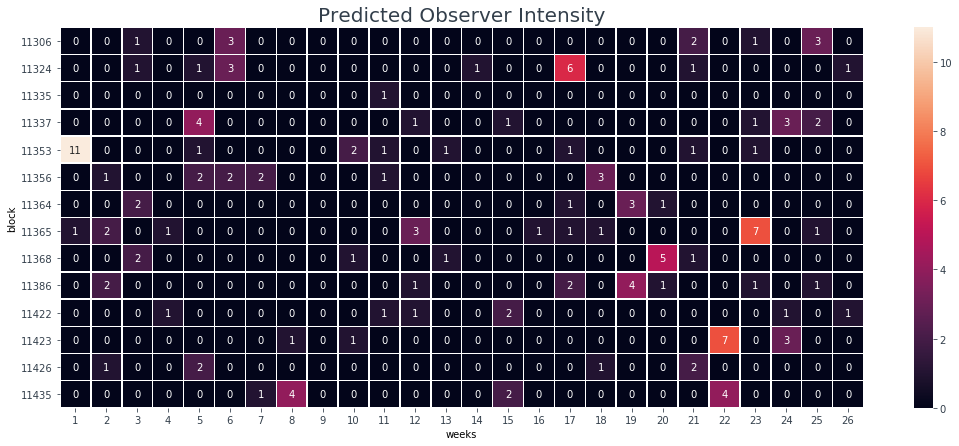

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
data = d
data = data.pivot("block", "weeks", "pred")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(18, 7))
ax = sns.heatmap(data, annot=True,linewidths=.5) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Predicted Observer Intensity',size=20)


Text(0.5, 1, 'True Observer Intensity')

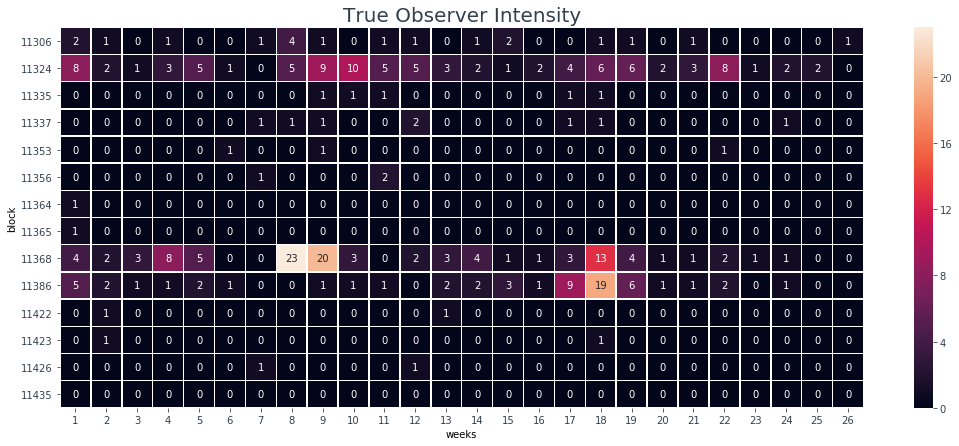

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

data = d
data = data.pivot("block", "weeks", "observations")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(18, 7))
ax = sns.heatmap(data, annot=True,linewidths=.5) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('True Observer Intensity',size=20)